In [2]:
import numpy as np
import os.path as op
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import arviz as az

In [13]:
target_folder = '/Users/mrenke/git/numrisk/behavior_simulations/data_saved'
df = pd.DataFrame()
params = pd.read_csv('/Users/mrenke/git/numrisk/behavior_simulations/sub-params_Miguel.csv')
sub_params = pd.DataFrame(data = {'subject': params.iloc[:,0], 'n1_evidence_sd': params.iloc[:,1], 'n2_evidence_sd': params.iloc[:,2], 'n2_prior_mu':params.iloc[:,3]})

count = 0
for denominator in [4,6, 10, 14, 20,26]:

    for run in range(1,10):
        try:
            trace = az.from_netcdf(op.join(target_folder, f'denom{denominator}_run{run}_trace.netcdf'))
            n1_ev_sd = trace.posterior['n1_evidence_sd'].to_dataframe()
            denom = n1_ev_sd
            dc = pd.DataFrame(data={'evid_sd_std': denom.groupby('subject').std()['n1_evidence_sd'],'evid_sd_mu':denom.groupby('subject').mean()['n1_evidence_sd'], 'true_evid_sd_mu': sub_params.set_index('subject')['n1_evidence_sd'] })

            x = 'evid_sd_mu'
            y = 'true_evid_sd_mu'
            z =  'evid_sd_std'

            ccy = pearsonr(dc[x], dc[y])
            ccz = pearsonr(dc[x], dc[z])

            count += 1
            d = pd.DataFrame(data={'denom' : denominator,'run': run, 
                    'evid_sd_mu_true-est_cc': round(ccy[0],3), 
                    'evid_sd_mu_true-est_pv': round(ccy[1],3), 
                    'evid_sd_mu-std_cc': round(ccz[0],3),    
                    'evid_sd_mu-std_pv': round(ccz[1],3),
                    'mean_evid_sd' : dc['evid_sd_std'].mean()},
                    index=[count])

            df = pd.concat([df,d ])
        except :
            print('incomplete runs for that denom')


incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom


In [11]:
df

,denom,run,evid_sd_mu_true-est_cc,evid_sd_mu_true-est_pv,evid_sd_mu-std_cc,evid_sd_mu-std_pv,mean_evid_sd
1,6,1,0.849,0.0,0.934,0.0,0.041709
2,6,2,0.876,0.0,0.977,0.0,0.045303
3,6,3,0.842,0.0,0.966,0.0,0.043975
4,6,4,0.860,0.0,0.943,0.0,0.042171
5,6,5,0.819,0.0,0.965,0.0,0.045039
6,6,6,0.816,0.0,0.961,0.0,0.046288
7,6,7,0.878,0.0,0.959,0.0,0.044046
8,6,8,0.840,0.0,0.955,0.0,0.046493
9,6,9,0.877,0.0,0.939,0.0,0.042402
10,10,1,0.809,0.0,0.964,0.0,0.046284


<AxesSubplot: xlabel='denom', ylabel='evid_sd_mu_true-est_cc'>

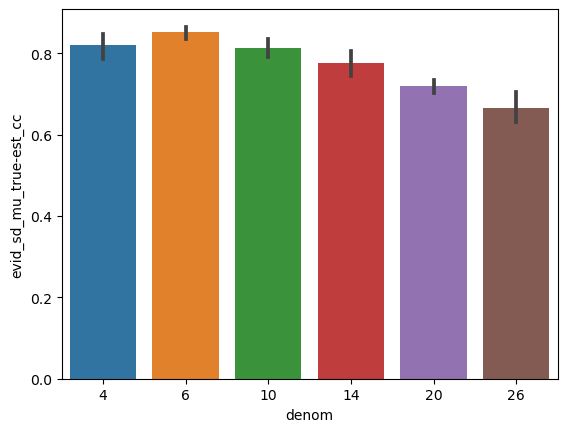

In [14]:
sns.barplot(df, x='denom', y='evid_sd_mu_true-est_cc')

<AxesSubplot: xlabel='denom', ylabel='mean_evid_sd'>

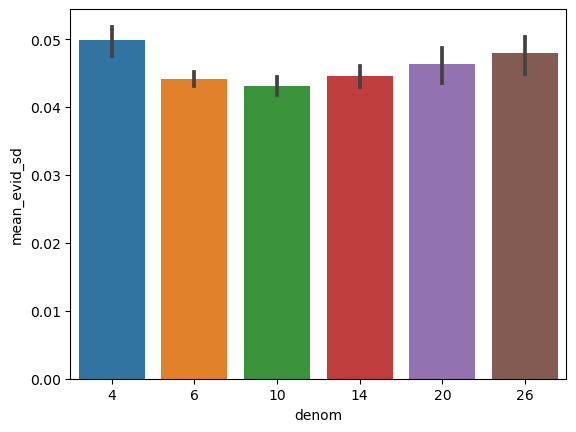

In [15]:
sns.barplot(df, x='denom', y='mean_evid_sd')

In [ ]:
count = 0
for denominator in [4,6, 10, 14, 20,26]:

    for run in range(1,10):
        df_sim = pd.read_csv(op.join(target_folder, f'denom{denominator}_run{run}_sim-data.csv'))
        


In [17]:
df_sim = pd.read_csv(op.join(target_folder, f'denom4_run1_sim-data.csv'))
df_sim

,subject,trial_nr,base number,fraction,repetition,n1,n2,trial,sim_choice,choice
0,1,1,20,0.420448,1,20,8,1,0,0
1,1,2,14,1.414214,1,14,19,2,1,1
2,1,3,20,0.353553,3,20,7,3,0,0
3,1,4,14,1.681793,1,14,23,4,1,1
4,1,5,7,1.189207,2,7,8,5,1,1
...,...,...,...,...,...,...,...,...,...,...
11515,64,176,5,0.840896,2,5,4,176,0,0
11516,64,177,14,2.828427,2,14,39,177,1,1
11517,64,178,20,0.353553,1,20,7,178,0,0
11518,64,179,20,1.189207,2,20,23,179,1,1


In [ ]:
l = []
for i in range(0,len(df_sim)):
    r = df_sim.iloc[i]
    if r['n2'] > r['n1']:
        if r['choice'] == 1:
            l = True
        if r['choice'] == 1:
            l = False
    if r['n2'] > r['n1']:
        if r['choice'] == 1:
            l = True
        if r['choice'] == 1:
            l = False